# COGS 109 Final Project Report
### Molly Varozza, Daniil Magaril, Amy Li, Jason Lee

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [73]:
data = pd.read_csv("imports-85.csv")

print(data.shape)
print(type(data))
print(data)

(205, 26)
<class 'pandas.core.frame.DataFrame'>
     0    1            2       3      4     5            6    7      8      9  \
0    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
1    3    ?  alfa-romero     gas    std   two  convertible  rwd  front   88.6   
2    1    ?  alfa-romero     gas    std   two    hatchback  rwd  front   94.5   
3    2  164         audi     gas    std  four        sedan  fwd  front   99.8   
4    2  164         audi     gas    std  four        sedan  4wd  front   99.4   
5    2    ?         audi     gas    std   two        sedan  fwd  front   99.8   
6    1  158         audi     gas    std  four        sedan  fwd  front  105.8   
7    1    ?         audi     gas    std  four        wagon  fwd  front  105.8   
8    1  158         audi     gas  turbo  four        sedan  fwd  front  105.8   
9    0    ?         audi     gas  turbo   two    hatchback  4wd  front   99.5   
10   2  192          bmw     gas    std   two        sedan  r

In [74]:
# Duration on product-related page vs whether they purchased something or not 
cityMPG = data['23']
engineSize = data['16']
'''
X,Y =[],[]
for i in range(len(revenue)):
    if(productRelatedDuration[i]<20000):
        X.append(revenue[i])
        Y.append(productRelatedDuration[i])
        '''


'\nX,Y =[],[]\nfor i in range(len(revenue)):\n    if(productRelatedDuration[i]<20000):\n        X.append(revenue[i])\n        Y.append(productRelatedDuration[i])\n        '

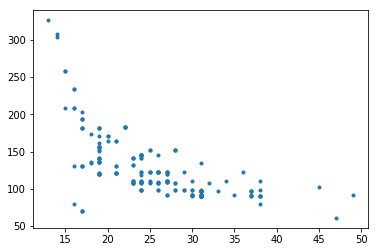

In [76]:
X = cityMPG
Y = engineSize

#initial data plot
plt.plot(X, Y, '.')

In [77]:
#Create matrices for first and second order models
A1 = np.column_stack((np.ones((X.shape)), X))
w1 = np.linalg.lstsq( A1, Y, rcond = None)[0]

A2 = np.column_stack((np.ones((X.shape)), X, np.square(X)))
w2 = np.linalg.lstsq( A2, Y, rcond = None)[0]

[ 3.84232333e+02 -1.60458852e+01  2.17125262e-01]


In [78]:
#Use matrices generated above to create models
y_pred1 = np.matmul(A1, w1)
y_pred2 = np.matmul(A2, w2)

xRange = np.linspace(min(X), max(X))
ones = np.ones(len(xRange))
squares = np.square(xRange)

A1 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A1, w1)

A2 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A2, w2)

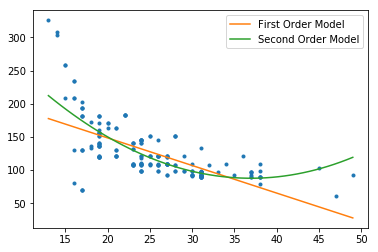

In [80]:
#Plot data alongside created models
plt.plot(X,Y, '.')

linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)

plt.legend([linModel, quadModel], ["First Order Model", "Second Order Model"])

In [81]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred1 - Y))
SSEQuad = sum(np.square(y_pred2 - Y))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad)

('Linear SSE:', 202608.9989155697, '\nQuadratic SSE:', 165768.67310066143)
